## Working with DateTime fields

In [3]:
library(plyr)
library(ggplot2)
library(tidyverse)
library(lubridate)
library(tibble)
library(chron)

#options(stringsAsFactors = FALSE)

In [4]:
CrimeData = read.csv("NYPD_Complaint_Data_Current__Year_To_Date_.csv")

In [5]:
#CD <- data.frame(CrimeData[1:300000,])
CD <- data.frame(CrimeData)

CD$ADDR_PCT_CD  <- as.factor(CD$ADDR_PCT_CD)
CD$ReportedDate <- mdy(CD$CMPLNT_TO_DT)

CD$ReportedDate <- as.Date(CD$ReportedDate)

CD$ReportedTime <- CD$CMPLNT_FR_TM
CD$ReportedTime <- chron(times=CD$ReportedTime)

CD$CMPLNT_FR_DT <- NULL
CD$CMPLNT_TO_DT <- NULL

In [6]:
CrimesAgainstBusiness    <- CD[CD$VIC_SEX == 'D',]
CrimesAgainstPeopleOfNYS <- CD[CD$VIC_SEX == 'E',]
CrimesAgainstPersons     <- CD[CD$VIC_SEX == 'M' | CD$VIC_SEX == 'F',]

In [7]:
head(CrimesAgainstPersons, n=1000)

dim(CrimeData)

,ï..CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_TM,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,JURISDICTION_CODE,JURIS_DESC,...,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New.Georeferenced.Column,ReportedDate,ReportedTime
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,...,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<date>,<times>
1,972326799,81,,21:27:00,,COMPLETED,,,NA,N.Y. POLICE DEPT,...,BLACK,M,1003904,186483,40.67852,-73.92914,"(40.67851591200008, -73.92914304899993)",POINT (-73.92914304899993 40.67851591200008),NA,21:27:00
2,376304873,52,,19:13:00,,COMPLETED,,,NA,N.Y. POLICE DEPT,...,BLACK HISPANIC,M,1017928,258050,40.87491,-73.87822,"(40.87490600500007, -73.87822380899996)",POINT (-73.87822380899996 40.87490600500007),NA,19:13:00
3,299326203,75,,01:21:00,,COMPLETED,,,NA,N.Y. POLICE DEPT,...,BLACK,M,1021234,181211,40.66399,-73.86669,"(40.66399002800006, -73.86669235099998)",POINT (-73.86669235099998 40.66399002800006),NA,01:21:00
4,674946147,121,,08:46:00,,COMPLETED,,,NA,N.Y. POLICE DEPT,...,BLACK,M,938430,170972,40.63584,-74.16509,"(40.63584491100005, -74.165090337)",POINT (-74.165090337 40.63584491100005),NA,08:46:00
5,416422620,101,,13:50:00,,COMPLETED,,,NA,N.Y. POLICE DEPT,...,BLACK,M,1049837,157548,40.59887,-73.76382,"(40.59887464700005, -73.76382298499993)",POINT (-73.76382298499993 40.59887464700005),NA,13:50:00
6,119130081,68,,06:50:00,,COMPLETED,,,NA,N.Y. POLICE DEPT,...,WHITE,M,978972,168177,40.62829,-74.01902,"(40.62829017100006, -74.01901584699993)",POINT (-74.01901584699993 40.62829017100006),NA,06:50:00
7,873514553,41,,21:30:00,,COMPLETED,,,NA,N.Y. POLICE DEPT,...,WHITE HISPANIC,M,1015461,237096,40.81740,-73.88724,"(40.81740254300007, -73.88724185399997)",POINT (-73.88724185399997 40.81740254300007),NA,21:30:00
8,383718152,46,,02:40:00,,COMPLETED,,,NA,N.Y. POLICE DEPT,...,BLACK,M,1008497,248717,40.84932,-73.91236,"(40.84932069000007, -73.91235948099995)",POINT (-73.91235948099995 40.84932069000007),NA,02:40:00
9,990133707,70,,20:40:00,,COMPLETED,,,NA,N.Y. POLICE DEPT,...,BLACK,M,996193,176571,40.65132,-73.95696,"(40.65132343000005, -73.95696100099997)",POINT (-73.95696100099997 40.65132343000005),NA,20:40:00


[1] 306656     36

## Temporary T Dataset for Pre-Processing and Visualization

In [10]:
T <- data.frame(
    OffenseDesc     = CrimesAgainstPersons$OFNS_DESC,
    VicSex          = CrimesAgainstPersons$VIC_SEX,
    VicRace         = CrimesAgainstPersons$VIC_RACE,
    VicAgeGroup     = CrimesAgainstPersons$VIC_AGE_GROUP,
    ReportedDate    = CrimesAgainstPersons$ReportedDate,
    ReportedTime    = CrimesAgainstPersons$ReportedTime,
    Borough         = CrimesAgainstPersons$BORO_NM,
    PremisesType    = CrimesAgainstPersons$PREM_TYP_DESC,
    SusAgeGroup     = CrimesAgainstPersons$SUSP_AGE_GROUP,
    SusRace         = CrimesAgainstPersons$SUSP_RACE,
    SusSex          = CrimesAgainstPersons$SUSP_SEX,
    Latitude        = CrimesAgainstPersons$Latitude,
    Longitude       = CrimesAgainstPersons$Longitude
)

# Victim Profile Encoding

VIC_BizOrg         = ifelse(T$VicSex == "D", 1,0)
VIC_PPLOfNYS       = ifelse(T$VicSex == "E", 1,0)

# Crime Information

# Victim Data
#T$VIC_Sex_M        = ifelse(T$VicSex == "M", 1,0)
#T$VIC_Sex_F        = ifelse(T$VicSex == "F", 1,0)

#T$VIC_Black        = ifelse(T$VicRace == "BLACK", 1,0)
#T$VIC_BlackHisp    = ifelse(T$VicRace == "BLACK HISPANIC", 1,0)
#T$VIC_White        = ifelse(T$VicRace == "WHITE", 1,0)
#T$VIC_WhiteHisp    = ifelse(T$VicRace == "WHITE HISPANIC", 1,0)
#T$VIC_Unknown      = ifelse(T$VicRace == "UNKNOWN", 1,0)
#T$VIC_Asian        = ifelse(T$VicRace == "ASIAN / PACIFIC ISLANDER", 1,0)

#T$VIC_AGE_U18         =ifelse(T$VicAgeGroup == "<18", 1, 0)
#T$VIC_AGE_18to24      =ifelse(T$VicAgeGroup == "18-24", 1, 0)
#T$VIC_AGE_25to44      =ifelse(T$VicAgeGroup == "25-44", 1, 0)
#T$VIC_AGE_45to64      =ifelse(T$VicAgeGroup == "45-64", 1, 0)
#T$VIC_AGE_65Plus      =ifelse(T$VicAgeGroup == "65+", 1, 0)
#T$VIC_AGE_Unknown     =ifelse(T$VicAgeGroup == "UNKNOWN", 1, 0)


# Removing Decoded Columns
#T$VicRace      <- NULL
#T$VicSex       <- NULL

# Convert Column Types
T$OffenseDesc <- as.factor(T$OffenseDesc)
T$ReportedDate <- as.POSIXlt(T$ReportedDate)

T <- na.omit(T)

# Remove all records older than 2020-01-01
T <- subset(T, T$ReportedDate > ("2019-12-31"))

# Add month column

T$Month = rep(0, nrow(T))

T$Month <- as.POSIXlt(T$ReportedDate)
T$Month <- format(as.Date(T$Month), "%B")

T <- na.omit(T)
T <- T[order(as.Date(T$ReportedDate)),]

# Adding a Week column
T$Week = rep(0, nrow(T))
T$Week <- strftime(T$ReportedDate, format = "%V")

# Adding a  Day Of Week column
T$DayOfWeek = rep(0, nrow(T))
T$DayOfWeek <- strftime(T$ReportedDate, format = "%A")

# Add an hour column
T$ReportedTime <- as.factor(T$ReportedTime)

T$Hour = rep(0, nrow(T))
T$Hour <- format(as.POSIXct(T$ReportedTime,format="%H:%M:%S"),"%H")

T <- na.omit(T)

### NYPD - Processing Ready Dataset

In [11]:
# Create Final Processing Ready Dataset

NYPD <- T

NYPD <- na.omit(NYPD)

NYPD$PremisesType      <- as.factor(NYPD$PremisesType)

#NYPD$VIC_Sex_M         <- as.factor(NYPD$VIC_Sex_M)
#NYPD$VIC_Sex_F         <- as.factor(NYPD$VIC_Sex_F)
#NYPD$VIC_Black         <- as.factor(NYPD$VIC_Black)
#NYPD$VIC_BlackHisp     <- as.factor(NYPD$VIC_BlackHisp)
#NYPD$VIC_White         <- as.factor(NYPD$VIC_White)
#NYPD$VIC_WhiteHisp     <- as.factor(NYPD$VIC_WhiteHisp)
#NYPD$VIC_Unknown       <- as.factor(NYPD$VIC_Unknown)
#NYPD$VIC_Asian         <- as.factor(NYPD$VIC_Asian)

NYPD$Borough           <- as.factor(NYPD$Borough)

#NYPD$VIC_AGE_U18        <- as.factor(NYPD$VIC_AGE_U18)
#NYPD$VIC_AGE_18to24     <- as.factor(NYPD$VIC_AGE_18to24)
#NYPD$VIC_AGE_25to44     <- as.factor(NYPD$VIC_AGE_25to44)
#NYPD$VIC_AGE_45to64     <- as.factor(NYPD$VIC_AGE_45to64)
#NYPD$VIC_AGE_65Plus     <- as.factor(NYPD$VIC_AGE_65Plus)

# Cleaning dataset
NYPD <- na.omit(NYPD)

## Cleaning location data
NYPD <- subset(NYPD, 
               Borough == "BROOKLYN" |
               Borough == "BRONX"|
               Borough == "QUEENS" |
               Borough == "STATEN ISLAND" |
               Borough == "MANHATTAN"
              )

NYPD$Borough <- droplevels(NYPD$Borough)

NYPD <- subset(NYPD,
               PremisesType == "RESIDENCE - APT. HOUSE" |
               PremisesType == "STREET" |
               PremisesType == "RESIDENCE-HOUSE" |
               PremisesType == "RESIDENCE - PUBLIC HOUSING" |
               PremisesType == "OTHER" |
               PremisesType == "GROCERY/BODEGA" |
               PremisesType == "COMMERCIAL BUILDING" |
               PremisesType == "PARK/PLAYGROUND" |
               PremisesType == "RESTAURANT/DINER"|
               PremisesType == "HOTEL/MOTEL" |
               PremisesType == "CHAIN STORE" |
               PremisesType == "HOMELESS SHELTER" |
               PremisesType == "PARKING LOT/GARAGE (PUBLIC" |
               PremisesType == "FAST FOOD" |
               PremisesType == "HOSPITAL" |
               PremisesType == "PARKING LOT/GARAGE (PRIVATE)" |
               PremisesType == "BAR/NIGHT CLUB" |
               PremisesType == "DEPARTMENT STORE" |
               PremisesType == "PUBLIC SCHOOL" |
               PremisesType == "BANK" |
               PremisesType == "BUS (NYC TRANSIT)" |
               PremisesType == "PUBLIC BUILDING" |
               PremisesType == "FOOD SUPERMARKET" |
               PremisesType == "DRUG STORE" |
               PremisesType == "HIGHWAY/PARKWAY" |
               PremisesType == "GAS STATION" |
               PremisesType == "DRY CLEANER/LAUNDRY" |
               PremisesType == "DOCTOR/DENTIST OFFICE"               
              )

NYPD$PremisesType <- droplevels(NYPD$PremisesType)

## CLEANING VICTIM DATA
NYPD <- subset(NYPD, 
               VicAgeGroup == "<18" |
               VicAgeGroup == "18-24" |
               VicAgeGroup == "25-44" |
               VicAgeGroup == "45-64" |
               VicAgeGroup == "65+"
              )

NYPD$VicAgeGroup <- droplevels(NYPD$VicAgeGroup)

NYPD <- subset(NYPD, VicSex == "M" | VicSex == "F")
NYPD$VicSex <-droplevels(NYPD$VicSex)

NYPD <- subset(NYPD,
               VicRace == "AMERICAN INDIAN/ALASKAN NATIVE" |
               VicRace == "ASIAN / PACIFIC ISLANDER" |
               VicRace == "BLACK" |
               VicRace == "BLACK HISPANIC" |
               VicRace == "WHITE HISPANIC" |
               VicRace == "WHITE" |
               VicRace == "UNKNOWN"
              )

NYPD$VicRace <- droplevels(NYPD$VicRace)

## CLEANING SUSPECT DATA
NYPD <- subset(NYPD, 
               Borough == "BROOKLYN" |
               Borough == "BRONX"|
               Borough == "QUEENS" |
               Borough == "STATEN ISLAND" |
               Borough == "MANHATTAN"
              )

NYPD$Borough <- droplevels(NYPD$Borough)

## CLEANING SUSPECT DATA
NYPD <- subset(NYPD, 
               SusAgeGroup == "<18" |
               SusAgeGroup == "18-24" |
               SusAgeGroup == "25-44" |
               SusAgeGroup == "45-64" |
               SusAgeGroup == "65+"
              )

NYPD$SusAgeGroup <- droplevels(NYPD$SusAgeGroup)

NYPD <- subset(NYPD, SusSex == "M" | SusSex == "F")
NYPD$SusSex <-droplevels(NYPD$SusSex)

NYPD <- subset(NYPD,
               SusRace == "AMERICAN INDIAN/ALASKAN NATIVE" |
               SusRace == "ASIAN / PACIFIC ISLANDER" |
               SusRace == "BLACK" |
               SusRace == "BLACK HISPANIC" |
               SusRace == "WHITE HISPANIC" |
               SusRace == "WHITE" |
               SusRace == "UNKNOWN"
              )
NYPD$SusRace <- droplevels(NYPD$SusRace)


# Drop unused columns

#NYPD$VicAgeGroup  <- NULL
NYPD$ReportedDate <- NULL
NYPD$ReportedTime <- NULL



# Cleaning dataset
NYPD <- na.omit(NYPD)

summary(NYPD)

                         OffenseDesc    VicSex   
 HARRASSMENT 2                 :23752   F:50642  
 ASSAULT 3 & RELATED OFFENSES  :17824   M:29599  
 FELONY ASSAULT                : 7635            
 OFF. AGNST PUB ORD SENSBLTY & : 5402            
 MISCELLANEOUS PENAL LAW       : 5100            
 CRIMINAL MISCHIEF & RELATED OF: 4486            
 (Other)                       :16042            
                           VicRace      VicAgeGroup            Borough     
 AMERICAN INDIAN/ALASKAN NATIVE:  279   <18  : 4276   BRONX        :17718  
 ASIAN / PACIFIC ISLANDER      : 6871   18-24:11069   BROOKLYN     :24245  
 BLACK                         :31345   25-44:41270   MANHATTAN    :14925  
 BLACK HISPANIC                : 4587   45-64:19699   QUEENS       :19731  
 UNKNOWN                       : 2470   65+  : 3927   STATEN ISLAND: 3622  
 WHITE                         :13753                                      
 WHITE HISPANIC                :20936                               

In [12]:
head(NYPD)

,OffenseDesc,VicSex,VicRace,VicAgeGroup,Borough,PremisesType,SusAgeGroup,SusRace,SusSex,Latitude,Longitude,Month,Week,DayOfWeek,Hour
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
12313,RAPE,F,BLACK,<18,BRONX,HOMELESS SHELTER,25-44,BLACK,M,40.81639,-73.89530,January,01,Wednesday,01
43090,ASSAULT 3 & RELATED OFFENSES,F,BLACK HISPANIC,<18,BROOKLYN,RESIDENCE - APT. HOUSE,25-44,WHITE,M,40.60631,-73.97598,January,01,Wednesday,20
67662,RAPE,F,BLACK,<18,QUEENS,RESIDENCE - APT. HOUSE,18-24,BLACK,M,40.60295,-73.74998,January,01,Wednesday,15
96362,SEX CRIMES,F,WHITE HISPANIC,<18,QUEENS,RESIDENCE - APT. HOUSE,25-44,WHITE HISPANIC,M,40.74525,-73.87006,January,01,Wednesday,00
104925,RAPE,F,WHITE HISPANIC,25-44,QUEENS,RESIDENCE - APT. HOUSE,25-44,WHITE HISPANIC,M,40.74525,-73.87006,January,01,Wednesday,10
113136,RAPE,M,BLACK,<18,QUEENS,RESIDENCE - APT. HOUSE,25-44,UNKNOWN,F,40.74525,-73.87006,January,01,Wednesday,00


## Summarize Datetime Data

In [13]:
T$Month <- as.factor(T$Month)
T       <- na.omit(T)

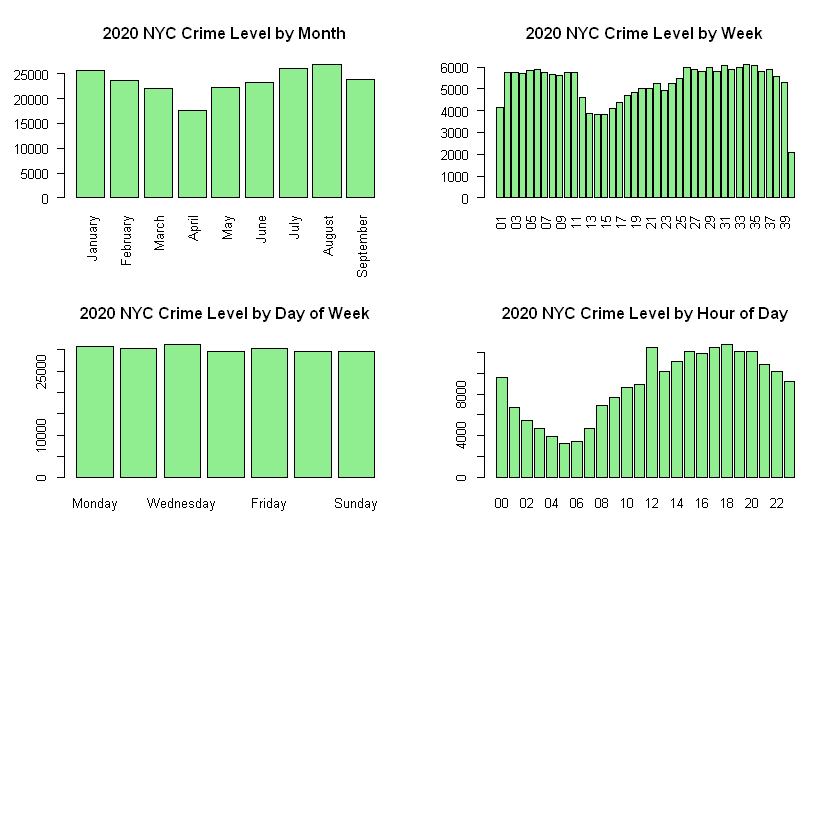

In [84]:
par(mfrow=c(3,2))

mos = as.data.frame(summary(T$Month))
mos <- factor(T$Month, levels = c("January","February","March","April","May", 
                              "June","July","August","September","November", "December"))
mos <- droplevels(mos)

by_month =summary(mos)

barplot(by_month, main = "2020 NYC Crime Level by Month", cex.names = 1, col='lightgreen', las = 2 )

# Summarize Weekly Data
T$Week <- as.factor(T$Week)
barplot(summary(T$Week), cex.names = 1, las = 2, col='lightgreen', main = "2020 NYC Crime Level by Week")


# Summarize daily data
T$DayOfWeek <- as.factor(T$DayOfWeek)

days <- factor(T$DayOfWeek, levels = c("Monday","Tuesday","Wednesday","Thursday","Friday", 
                              "Saturday","Sunday"))

barplot(summary(days), cex.names = 1, col='lightgreen', main = "2020 NYC Crime Level by Day of Week")


T$Hour <- as.factor(T$Hour)
barplot(summary(T$Hour), cex.names = 1, col='lightgreen',main = "2020 NYC Crime Level by Hour of Day")


## Working with Time

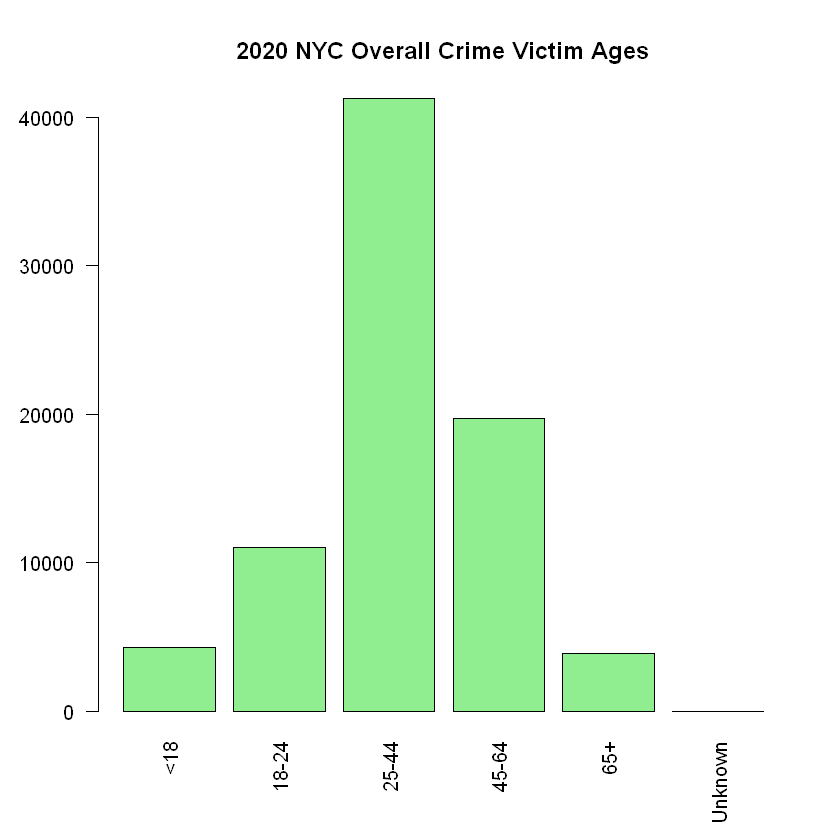

In [87]:
# Summarize Victim Data
NYPD <- na.omit(NYPD)
# Summarize daily data
NYPD$VicAgeGroup <- as.factor(NYPD$VicAgeGroup)
#NYPD$VicAgeGroup <- droplevels(NYPD$VicAgeGroup)

vic_ages <- factor(NYPD$VicAgeGroup, levels = c("<18","18-24","25-44","45-64","65+","Unknown"))

barplot(summary(vic_ages), cex.names = 1,col='lightgreen', las = 2, main = "2020 NYC Overall Crime Victim Ages")

# Harrasment In The 2nd Degree Data

Definition: a person is guilty of Harassment in the
Second Degree when, with intent to harass, annoy or alarm
another person, he or she:

strikes, shoves, kicks or otherwise subjects such other
person to physical contact, or attempts or threatens to do
the same.


follows a person in or about a public place or places.

engages in a course of conduct or repeatedly commits acts
which alarm or seriously annoy such other person and
which serve no legitimate purpose. [NO LEGITIMATE
PURPOSE means the absence of expression of ideas or
thoughts other than threats and/or intimidating or coercive
conduct.

In [22]:
HarrasmentDS <- subset(NYPD, OffenseDesc == "HARRASSMENT 2")
dim(HarrasmentDS)


HarrasmentDS$Hour  <- as.integer(HarrasmentDS$Hour)
HarrasmentDS$Month <- as.factor(HarrasmentDS$Month)
HarrasmentDS$Week  <- as.factor(HarrasmentDS$Week)

summary(HarrasmentDS)

[1] 23752    15

                               OffenseDesc    VicSex   
 HARRASSMENT 2                       :23752   F:16215  
                                     :    0   M: 7537  
 ADMINISTRATIVE CODE                 :    0            
 AGRICULTURE & MRKTS LAW-UNCLASSIFIED:    0            
 ALCOHOLIC BEVERAGE CONTROL LAW      :    0            
 ANTICIPATORY OFFENSES               :    0            
 (Other)                             :    0            
                           VicRace     VicAgeGroup            Borough    
 AMERICAN INDIAN/ALASKAN NATIVE: 117   <18  :  808   BRONX        :5074  
 ASIAN / PACIFIC ISLANDER      :1915   18-24: 2568   BROOKLYN     :7262  
 BLACK                         :9534   25-44:11907   MANHATTAN    :4260  
 BLACK HISPANIC                :1290   45-64: 7005   QUEENS       :6025  
 UNKNOWN                       : 750   65+  : 1464   STATEN ISLAND:1131  
 WHITE                         :4393                                     
 WHITE HISPANIC                :57

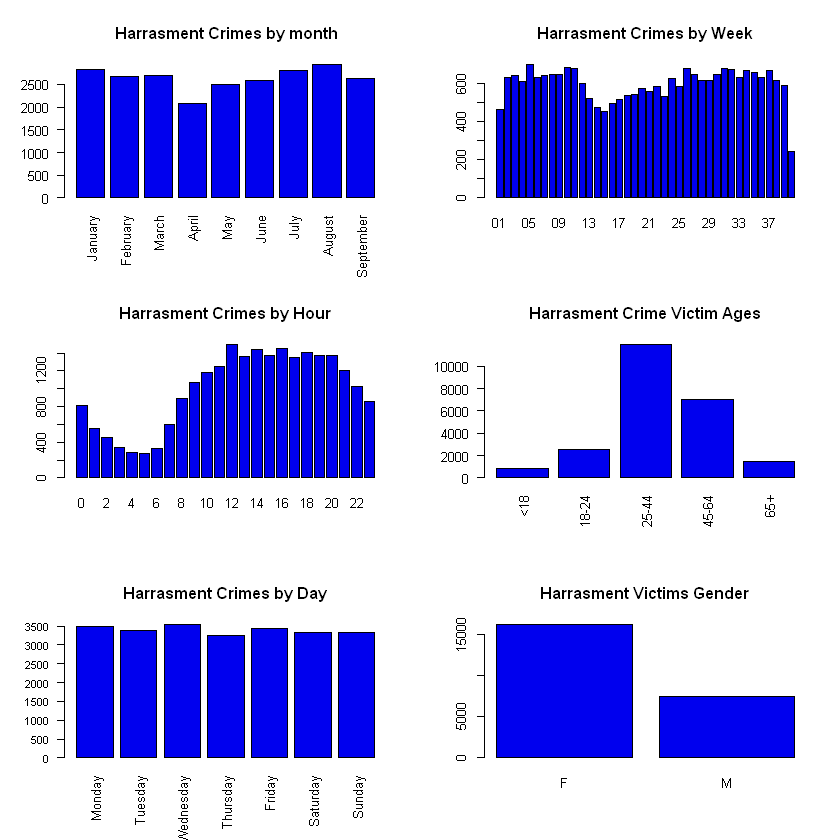

In [89]:
par(mfrow=c(3,2))

HarrasmentDS$Month <- as.factor(HarrasmentDS$Month)
mos = as.data.frame(summary(HarrasmentDS$Month))
mos <- factor(HarrasmentDS$Month, levels = c("January","February","March","April","May", 
                              "June","July","August","September","November", "December"))
mos <- droplevels(mos)
barplot(summary(mos), main = " Harrasment Crimes by month", cex.names = 1, col='blue2', las = 2)


HarrasmentDS$Week <- as.factor(HarrasmentDS$Week)
barplot(summary(HarrasmentDS$Week), cex.names = 1, col='blue2', main = "Harrasment Crimes by Week")

HarrasmentDS$Hour <- as.factor(HarrasmentDS$Hour)
barplot(summary(HarrasmentDS$Hour), cex.names = 1, col='blue2', main = "Harrasment Crimes by Hour")


vic_ages <- factor(HarrasmentDS$VicAgeGroup, levels = c("<18","18-24","25-44","45-64","65+"))
barplot(summary(vic_ages), cex.names = 1, col='blue2', las = 2, main = "Harrasment Crime Victim Ages")


days <- factor(HarrasmentDS$DayOfWeek, levels = c("Monday","Tuesday","Wednesday","Thursday","Friday", 
                              "Saturday","Sunday"))

barplot(summary(days), cex.names = 1, col='blue2', las = 2, cex = 0.8, main = "Harrasment Crimes by Day")

HarrasmentDS$VicSex <- as.factor(HarrasmentDS$VicSex)
barplot(summary(HarrasmentDS$VicSex), cex.names = 1, col='blue2', main = "Harrasment Victims Gender")


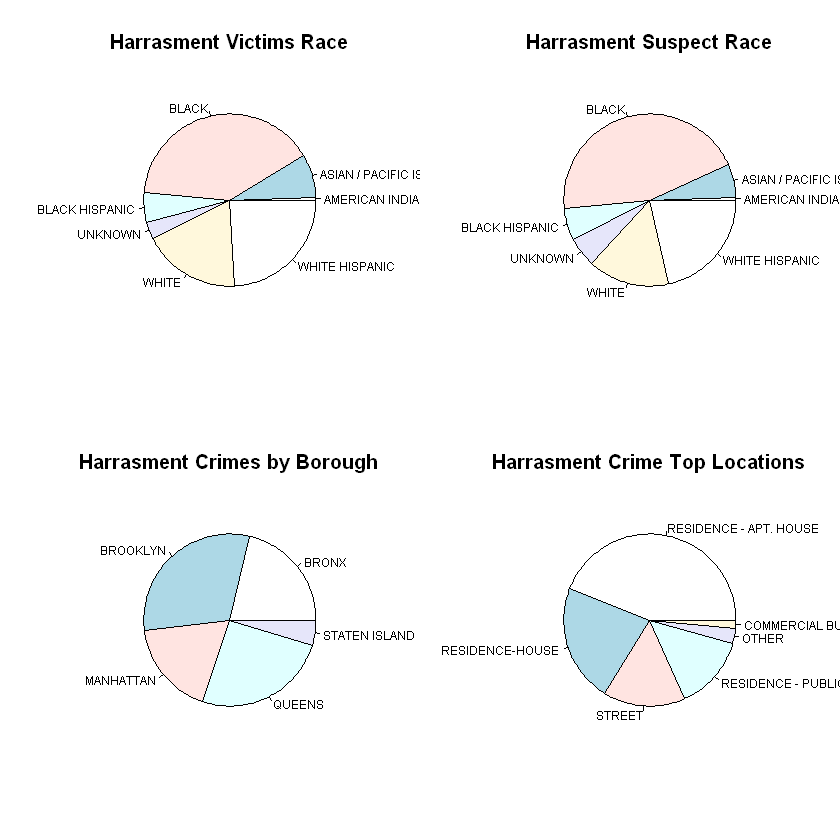

In [66]:
par(mfrow=c(2,2))
#summary(HarrasmentDS$VicRace)

#labes = c("Native", "Asian", "Black", "BlackHisp", "Unknown", "White", "WhiteHisp")

HarrasmentDS$VicRace <- as.factor(HarrasmentDS$VicRace)
pie(summary(HarrasmentDS$VicRace),cex = 0.7, las = 1, main = "Harrasment Victims Race")


HarrasmentDS$SusRace <- as.factor(HarrasmentDS$SusRace)
pie(summary(HarrasmentDS$SusRace), cex = 0.7, main = "Harrasment Suspect Race")


HarrasmentDS$Borough <- as.factor(HarrasmentDS$Borough)
pie(summary(HarrasmentDS$Borough), cex = 0.7, main = "Harrasment Crimes by Borough")

pie(head(sort(summary(HarrasmentDS$PremisesType), decreasing = TRUE), n = 6), cex = 0.7, 
       main = "Harrasment Crime Top Locations")

# Felony Assault Data

In [19]:
FelonyAssaultDS <- subset(NYPD, OffenseDesc == "FELONY ASSAULT")
dim(FelonyAssaultDS)

FelonyAssaultDS$Hour  <- as.integer(FelonyAssaultDS$Hour)
FelonyAssaultDS$Month <- as.factor(FelonyAssaultDS$Month)
FelonyAssaultDS$Week  <- as.factor(FelonyAssaultDS$Week)

summary(FelonyAssaultDS)

[1] 6946   15

                               OffenseDesc   VicSex  
 FELONY ASSAULT                      :6946   F:3664  
                                     :   0   M:3282  
 ADMINISTRATIVE CODE                 :   0           
 AGRICULTURE & MRKTS LAW-UNCLASSIFIED:   0           
 ALCOHOLIC BEVERAGE CONTROL LAW      :   0           
 ANTICIPATORY OFFENSES               :   0           
 (Other)                             :   0           
                           VicRace     VicAgeGroup           Borough    
 AMERICAN INDIAN/ALASKAN NATIVE:  11   <18  : 468   BRONX        :1799  
 ASIAN / PACIFIC ISLANDER      : 571   18-24:1066   BROOKLYN     :2073  
 BLACK                         :2970   25-44:3433   MANHATTAN    :1104  
 BLACK HISPANIC                : 461   45-64:1402   QUEENS       :1746  
 UNKNOWN                       : 157   65+  : 577   STATEN ISLAND: 224  
 WHITE                         : 857                                    
 WHITE HISPANIC                :1919                     

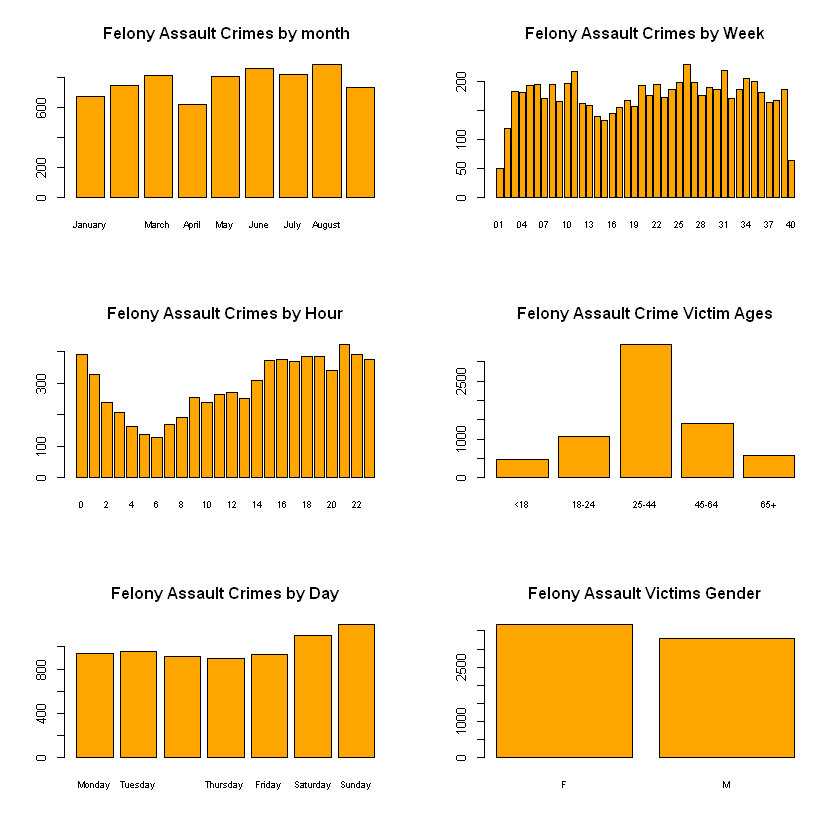

In [20]:
par(mfrow=c(3,2))

FelonyAssaultDS$Month <- as.factor(FelonyAssaultDS$Month)
mos = as.data.frame(summary(FelonyAssaultDS$Month))
mos <- factor(FelonyAssaultDS$Month, levels = c("January","February","March","April","May", 
                              "June","July","August","September","November", "December"))
mos <- droplevels(mos)
barplot(summary(mos), main = " Felony Assault Crimes by month", cex.names = 0.7, col='orange')


FelonyAssaultDS$Week <- as.factor(FelonyAssaultDS$Week)
barplot(summary(FelonyAssaultDS$Week), cex.names = 0.7, col='orange', main = "Felony Assault Crimes by Week")

FelonyAssaultDS$Hour <- as.factor(FelonyAssaultDS$Hour)
barplot(summary(FelonyAssaultDS$Hour), cex.names = 0.7, col='orange', main = "Felony Assault Crimes by Hour")



vic_ages <- factor(FelonyAssaultDS$VicAgeGroup, levels = c("<18","18-24","25-44","45-64","65+"))
barplot(summary(vic_ages), cex.names = 0.7, col='orange', main = "Felony Assault Crime Victim Ages")


days <- factor(FelonyAssaultDS$DayOfWeek, levels = c("Monday","Tuesday","Wednesday","Thursday","Friday", 
                              "Saturday","Sunday"))

barplot(summary(days), cex.names = 0.7, col='orange', main = "Felony Assault Crimes by Day")

FelonyAssaultDS$VicSex <- as.factor(FelonyAssaultDS$VicSex)
barplot(summary(FelonyAssaultDS$VicSex), cex.names = 0.7, col='orange', main = "Felony Assault Victims Gender")


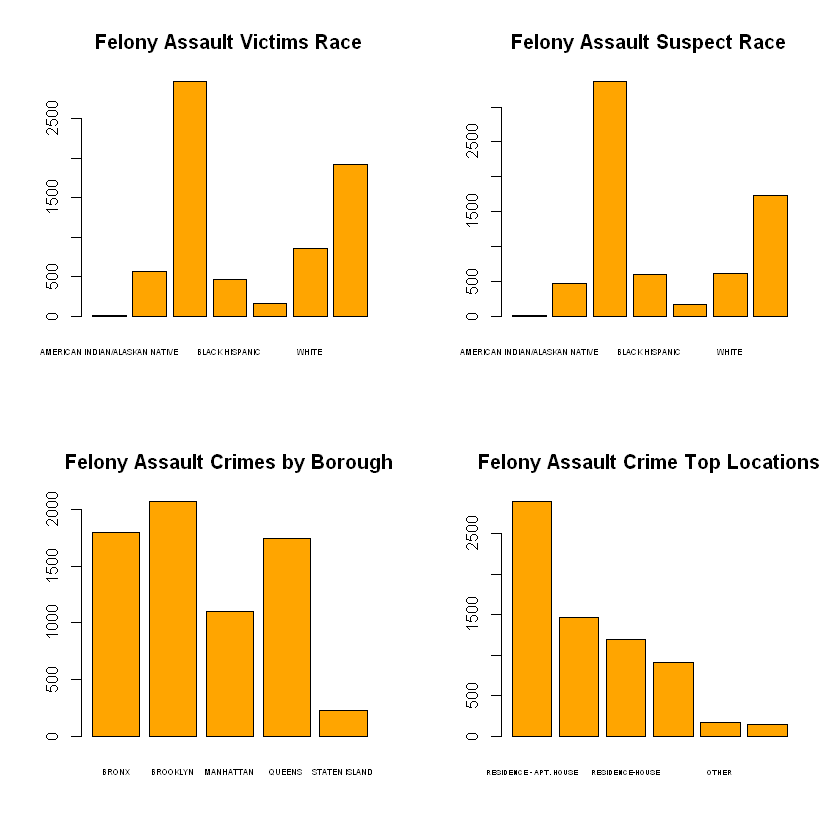

In [21]:
par(mfrow=c(2,2))


FelonyAssaultDS$VicRace <- as.factor(FelonyAssaultDS$VicRace)
barplot(summary(FelonyAssaultDS$VicRace), cex.names = 0.5, col='orange', main = "Felony Assault Victims Race")


FelonyAssaultDS$SusRace <- as.factor(FelonyAssaultDS$SusRace)
barplot(summary(FelonyAssaultDS$SusRace), cex.names = 0.5, col='orange', main = "Felony Assault Suspect Race")


FelonyAssaultDS$Borough <- as.factor(FelonyAssaultDS$Borough)
barplot(summary(FelonyAssaultDS$Borough), cex.names = 0.5, col='orange', main = "Felony Assault Crimes by Borough")

barplot(head(sort(summary(FelonyAssaultDS$PremisesType), decreasing = TRUE), n = 6), cex.names = 0.4, col='orange', 
       main = "Felony Assault Crime Top Locations")

In [22]:
sort(summary(FelonyAssaultDS$PremisesType), decreasing = TRUE)

RESIDENCE - APT. HOUSE                     STREET 
                      2897                       1468 
           RESIDENCE-HOUSE RESIDENCE - PUBLIC HOUSING 
                      1192                        906 
                     OTHER             GROCERY/BODEGA 
                       168                        144 
           PARK/PLAYGROUND           RESTAURANT/DINER 
                        89                         43 
       COMMERCIAL BUILDING 
                        39

# Harrasment 2 and Felony Assault Dataset
### Classification Problem - predict Harrasment 2 vs Felony Assault based on other features

In [58]:
H2FA <- subset(NYPD, 
               OffenseDesc == "HARRASSMENT 2" |
               #OffenseDesc == "FELONY ASSAULT"|
               OffenseDesc == "CRIMINAL MISCHIEF & RELATED OF"|
               OffenseDesc == "GRAND LARCENY"|
               OffenseDesc == "OFF. AGNST PUB ORD SENSBLTY &"|
               OffenseDesc == "ROBBERY"|
               OffenseDesc == "VEHICLE AND TRAFFIC LAWS"|
               OffenseDesc == "SEX CRIMES"|
               OffenseDesc == "OFFENSES AGAINST PUBLIC ADMINI"|
               OffenseDesc == "THEFT-FRAUD"|
               OffenseDesc == "RAPE"|
               OffenseDesc == "CRIMINAL TRESPASS"|
               OffenseDesc == "FRAUDS"|
               OffenseDesc == "UNAUTHORIZED USE OF A VEHICLE"|
               OffenseDesc == "ADMINISTRATIVE CODE"
              )

H2FA$Hour       <- as.integer(H2FA$Hour)
H2FA$Month      <- as.factor(H2FA$Month)
H2FA$Week       <- as.numeric(H2FA$Week)
H2FA$DayOfWeek  <- as.factor(H2FA$DayOfWeek)

H2FA$Harrassment   = ifelse(H2FA$OffenseDesc == "HARRASSMENT 2", TRUE, FALSE)
#H2FA$FelonyAssault = ifelse(H2FA$OffenseDesc == "FELONY ASSAULT", TRUE, FALSE) 

H2FA$OffenseDesc <- droplevels(H2FA$OffenseDesc)

H2FA           <- as.data.frame(H2FA)
rownames(H2FA) <- NULL

summary(H2FA)



set.seed(101)
train = sample(1:nrow(H2FA), 15000)

set.seed(202)
test = sample(1:nrow(H2FA), 10000)


                         OffenseDesc    VicSex   
 HARRASSMENT 2                 :23285   F:28850  
 OFF. AGNST PUB ORD SENSBLTY & : 5288   M:14800  
 CRIMINAL MISCHIEF & RELATED OF: 4398            
 ROBBERY                       : 3196            
 OFFENSES AGAINST PUBLIC ADMINI: 2170            
 GRAND LARCENY                 : 1923            
 (Other)                       : 3390            
                           VicRace      VicAgeGroup            Borough     
 AMERICAN INDIAN/ALASKAN NATIVE:  163   <18  : 2406   BRONX        : 9602  
 ASIAN / PACIFIC ISLANDER      : 3585   18-24: 5520   BROOKLYN     :13083  
 BLACK                         :17171   25-44:22047   MANHATTAN    : 8433  
 BLACK HISPANIC                : 2442   45-64:11298   QUEENS       :10457  
 UNKNOWN                       : 1406   65+  : 2379   STATEN ISLAND: 2075  
 WHITE                         : 7832                                      
 WHITE HISPANIC                :11051                               

In [49]:
head(H2FA, n= 100)

OffenseDesc,VicSex,VicRace,VicAgeGroup,Borough,PremisesType,SusAgeGroup,SusRace,SusSex,Latitude,Longitude,Month,Week,DayOfWeek,Hour,Harrassment
RAPE,F,BLACK,<18,QUEENS,RESIDENCE - APT. HOUSE,18-24,BLACK,M,40.60295,-73.74998,January,1,Wednesday,15,FALSE
SEX CRIMES,F,WHITE HISPANIC,<18,QUEENS,RESIDENCE - APT. HOUSE,25-44,WHITE HISPANIC,M,40.74525,-73.87006,January,1,Wednesday,0,FALSE
RAPE,F,WHITE HISPANIC,25-44,QUEENS,RESIDENCE - APT. HOUSE,25-44,WHITE HISPANIC,M,40.74525,-73.87006,January,1,Wednesday,10,FALSE
RAPE,M,BLACK,<18,QUEENS,RESIDENCE - APT. HOUSE,25-44,UNKNOWN,F,40.74525,-73.87006,January,1,Wednesday,0,FALSE
SEX CRIMES,F,UNKNOWN,25-44,BROOKLYN,RESIDENCE - APT. HOUSE,25-44,UNKNOWN,M,40.60260,-74.00309,January,1,Wednesday,0,FALSE
HARRASSMENT 2,F,BLACK HISPANIC,45-64,BROOKLYN,RESIDENCE - PUBLIC HOUSING,25-44,BLACK,F,40.66793,-73.90493,January,1,Wednesday,12,TRUE
RAPE,F,WHITE,18-24,BROOKLYN,RESIDENCE - APT. HOUSE,25-44,UNKNOWN,M,40.59415,-73.96041,January,1,Wednesday,0,FALSE
RAPE,F,WHITE HISPANIC,<18,BRONX,RESIDENCE - APT. HOUSE,18-24,BLACK,M,40.81639,-73.89530,January,1,Wednesday,14,FALSE
RAPE,F,WHITE,18-24,BROOKLYN,RESIDENCE - APT. HOUSE,25-44,WHITE,M,40.59415,-73.96041,January,1,Wednesday,0,FALSE
HARRASSMENT 2,F,ASIAN / PACIFIC ISLANDER,25-44,QUEENS,RESIDENCE-HOUSE,25-44,ASIAN / PACIFIC ISLANDER,M,40.68318,-73.79120,January,1,Wednesday,22,TRUE


In [25]:
library(ISLR)
library(tree)
attach(H2FA)

Warning message:
"package 'ISLR' was built under R version 3.6.3"Warning message:
"package 'tree' was built under R version 3.6.3"Registered S3 method overwritten by 'tree':
  method     from
  print.tree cli 


## Decision Tree Classifier

### Classifying Felony Assaults using a Regression Tree Method

### Next Step:  Improve Decision Tree performance with ensamble methods

https://www.datacamp.com/community/tutorials/decision-trees-R


Regression tree:
tree(formula = FelonyAssault ~ . - Harrassment - OffenseDesc, 
    data = H2FA, subset = train)
Variables actually used in tree construction:
[1] "VicSex"  "SusRace"
Number of terminal nodes:  3 
Residual mean deviance:  0.1802 = 2702 / 15000 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.3760 -0.2008 -0.2008  0.0000 -0.1821  0.8179 

node), split, n, deviance, yval
      * denotes terminal node

1) root 15000 2796.0 0.2479  
  2) VicSex: F 9799 1573.0 0.2008 *
  3) VicSex: M 5201 1161.0 0.3365  
    6) SusRace: AMERICAN INDIAN/ALASKAN NATIVE,UNKNOWN,WHITE 1060  157.9 0.1821 *
    7) SusRace: ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE HISPANIC 4141  971.6 0.3760 *

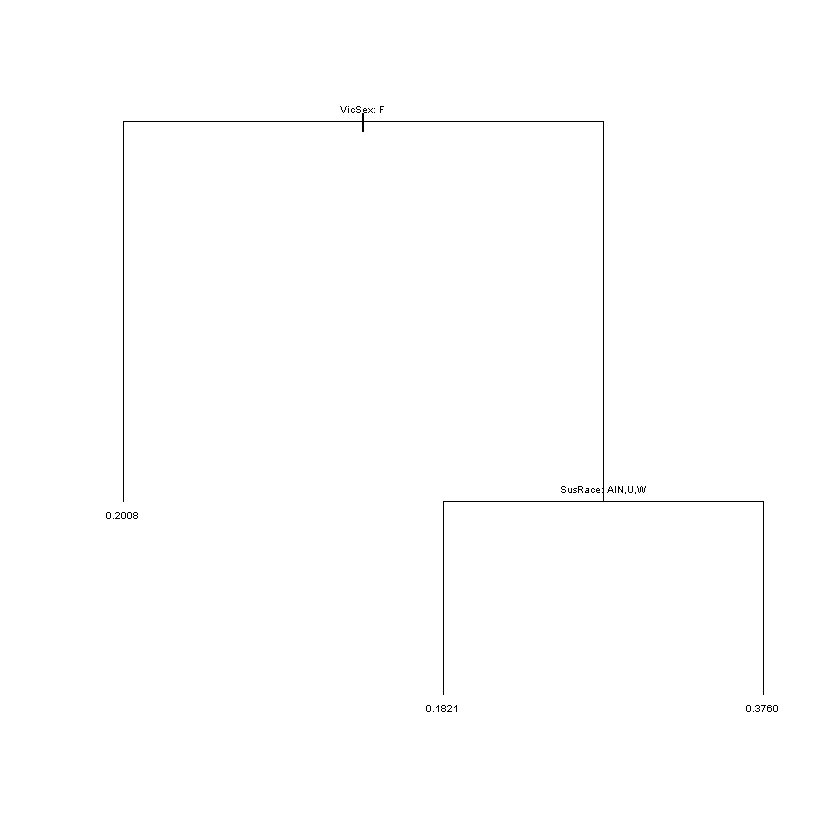

In [29]:
tree.fel_assaults = tree(FelonyAssault~.-Harrassment-OffenseDesc, data = H2FA, subset = train)
summary(tree.fel_assaults)

tree.fel_assaults

plot(tree.fel_assaults)
text(tree.fel_assaults, pretty=1, cex = 0.5)

In [32]:
pred.tree.fel_assaults = predict(tree.fel_assaults, data =H2FA, subset = test)

## Classifying Harrassment 2 using regression Trees


Regression tree:
tree(formula = Harrassment ~ . - OffenseDesc, data = H2FA)
Variables actually used in tree construction:
[1] "SusAgeGroup"  "PremisesType"
Number of terminal nodes:  3 
Residual mean deviance:  0.2387 = 10420 / 43650 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.6813 -0.5267  0.3187  0.0000  0.4733  0.6416 

node), split, n, deviance, yval
      * denotes terminal node

1) root 43650 10860 0.5334  
  2) SusAgeGroup: <18,18-24,25-44 33665  8413 0.4896  
    4) PremisesType: BANK,GAS STATION,HIGHWAY/PARKWAY,HOTEL/MOTEL,PARK/PLAYGROUND,PARKING LOT/GARAGE (PRIVATE),STREET 7427  1708 0.3584 *
    5) PremisesType: BAR/NIGHT CLUB,BUS (NYC TRANSIT),CHAIN STORE,COMMERCIAL BUILDING,DEPARTMENT STORE,DOCTOR/DENTIST OFFICE,DRUG STORE,DRY CLEANER/LAUNDRY,FAST FOOD,FOOD SUPERMARKET,GROCERY/BODEGA,HOMELESS SHELTER,HOSPITAL,OTHER,PUBLIC BUILDING,PUBLIC SCHOOL,RESIDENCE-HOUSE,RESIDENCE - APT. HOUSE,RESIDENCE - PUBLIC HOUSING,RESTAURANT/DINER 26238  6541 0.5267 *
  3) SusAgeGroup: 45-64,65+ 9985  2168 0.6813 *

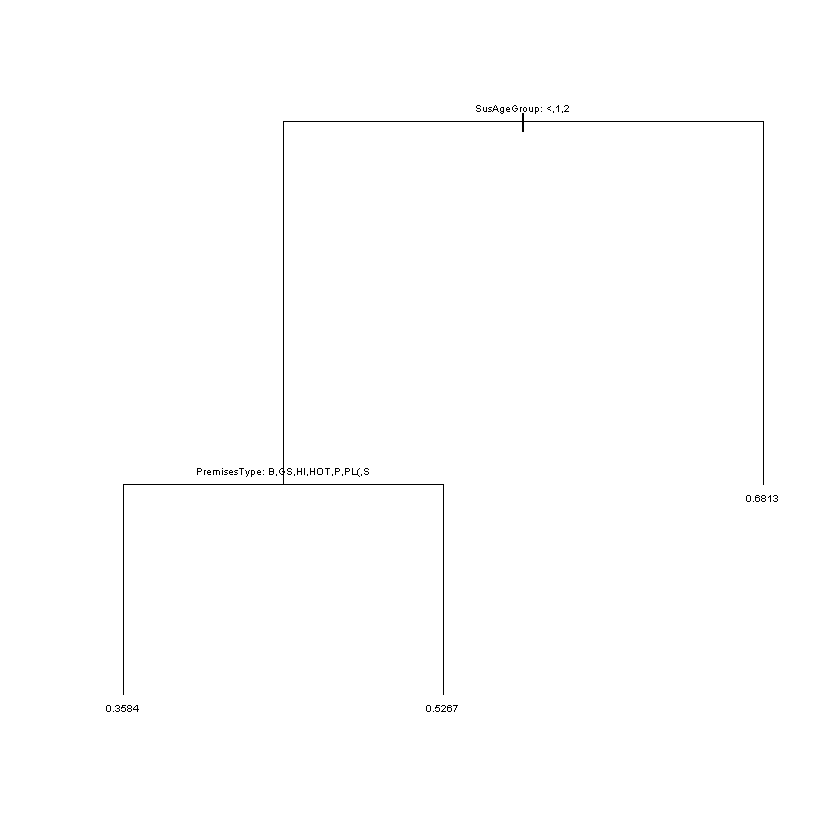

In [59]:
tree.harrassment = tree(Harrassment~.-OffenseDesc, data = H2FA)
summary(tree.harrassment)

tree.harrassment

plot(tree.harrassment)
text(tree.harrassment, pretty=1, cex = 0.5)

## Classification using Logistic Regression

In [60]:
# performing logistic regression with Direction as response,
# Lag1 through Lag5 and Volume as predictors

# binomial logistic regression predicts if a response falls into one of two classes

#tree.crimes = tree(H2FA$OffenseDesc~.,data = H2FA)
#summary(tree.crimes)


glm.fel_assault = glm(Harrassment~.-OffenseDesc-Harrassment,data = H2FA)
summary(glm.fel_assault)


Call:
glm(formula = Harrassment ~ . - OffenseDesc - Harrassment, data = H2FA)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0151  -0.4801   0.2107   0.4471   0.9928  

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                              -1.099e+01  5.194e+00  -2.117 0.034292
VicSexM                                  -4.979e-02  5.073e-03  -9.814  < 2e-16
VicRaceASIAN / PACIFIC ISLANDER          -1.812e-01  4.005e-02  -4.525 6.05e-06
VicRaceBLACK                             -1.285e-01  3.937e-02  -3.263 0.001103
VicRaceBLACK HISPANIC                    -1.310e-01  4.040e-02  -3.243 0.001184
VicRaceUNKNOWN                           -1.572e-01  4.108e-02  -3.828 0.000130
VicRaceWHITE                             -1.649e-01  3.947e-02  -4.178 2.95e-05
VicRaceWHITE HISPANIC                    -1.565e-01  3.943e-02  -3.968 7.27e-05
VicAgeGroup18-24                          1.574e-01  1.210e-02  13.008  


Call:
glm(formula = Harrassment ~ . - OffenseDesc - Harrassment, data = H2FA)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0151  -0.4801   0.2107   0.4471   0.9928  

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                              -1.099e+01  5.194e+00  -2.117 0.034292
VicSexM                                  -4.979e-02  5.073e-03  -9.814  < 2e-16
VicRaceASIAN / PACIFIC ISLANDER          -1.812e-01  4.005e-02  -4.525 6.05e-06
VicRaceBLACK                             -1.285e-01  3.937e-02  -3.263 0.001103
VicRaceBLACK HISPANIC                    -1.310e-01  4.040e-02  -3.243 0.001184
VicRaceUNKNOWN                           -1.572e-01  4.108e-02  -3.828 0.000130
VicRaceWHITE                             -1.649e-01  3.947e-02  -4.178 2.95e-05
VicRaceWHITE HISPANIC                    -1.565e-01  3.943e-02  -3.968 7.27e-05
VicAgeGroup18-24                          1.574e-01  1.210e-02  13.008  

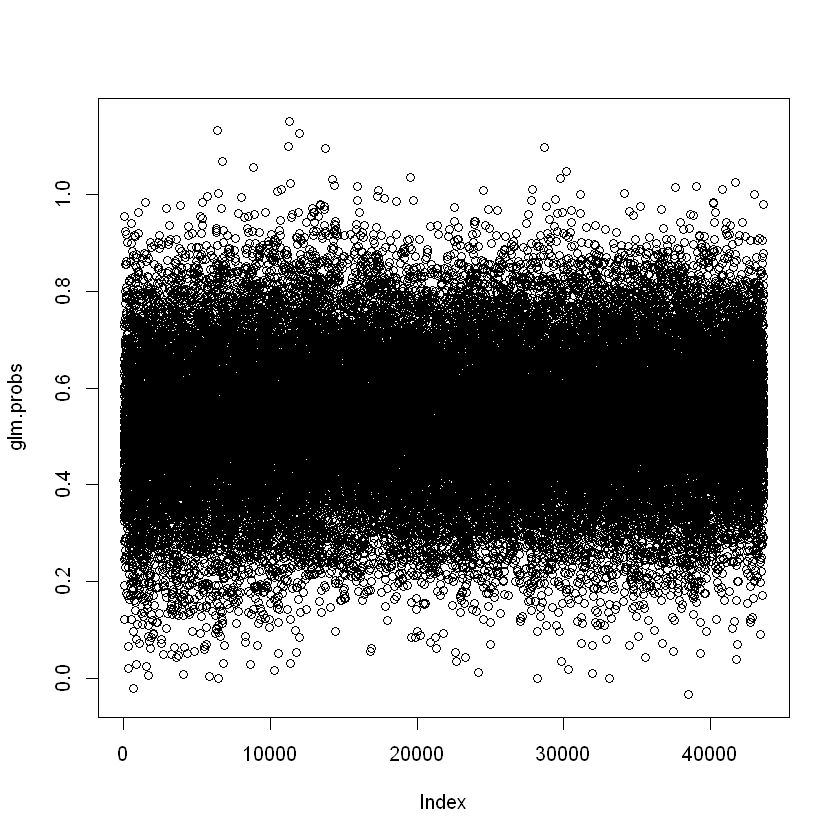

In [62]:
glm.probs=predict(glm.fel_assault,type="response")

summary(glm.fel_assault)

plot(glm.probs)
#glm.pred=rep("Down", 1089)
#glm.pred[glm.probs>0.5]="Up"
#table(glm.pred, Direction)